# Population Dynamics

### Periodic solutions: from conservative to dissipative dynamical systems.

In this notebook, we propose to work around the modeling of population dynamics and to consider three success models presenting at each stage, from the point of view of modeling, a complexity of the model taking into account a new effect. This hierarchy of models includes, as we will see, various dynamical behaviors.

The point on which we will focus is that of the qualitative study of periodic solutions that can be obtained for models 1 and 3, around the equations of Alfred James Lotka (1880 - 1949) and Vito Volterra (1860 - 1940).

<table>
        <tr>
            <td><img src="images/lotka.jpg" alt="A.J. Lotka" style="width: 150px;" /></td>
            <td><img src="images/volterra.jpg" alt="V. Volterra" style="width: 150px;" /></td>
        </tr>
</table>

## The Lokta-Volterra model

By representing by $u_1(t)$ the total mass of plants and $u_2(t)$ the total mass of herbivores at instant $t$, Lokta introduces the following model :

$$
\left\{\begin{aligned}
\mathrm{d}_t u_1 & = u_1 \, (1-u_2)\\
\mathrm{d}_t u_2 & = u_2 \, (-k+u_1)
\end{aligned}\right.
$$

In [5]:
import numpy as np
from scipy.integrate import solve_ivp

from mylib.model import lokta_model
import matplotlib.pyplot as pyplot
from bokeh.io import  output_notebook, push_notebook
from bokeh.plotting import figure, show
from bokeh.layouts import column, row

output_notebook(hide_banner=True)

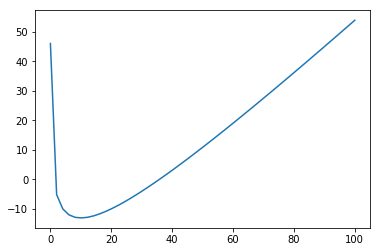

In [7]:
x=np.linspace(0.01,100)
k=10
y=x-k*np.log(x)
pyplot.plot(x,y)

In [61]:
k=1
lm = lokta_model(k)
fcn = lm.fcn
# 初始条件
uini = (1, 1)
tini = 0
tend = 60

tol = 1.e-8

inv_ini = uini[0] + uini[1] - np.log(uini[1] * np.power(uini[0],k))

sol = solve_ivp(fcn, (tini, tend), uini, rtol=tol, atol=tol)
u1 = sol.y[0]
u2 = sol.y[1]
inv = u1 + u2 - np.log(u2 * np.power(u1,k))

fig_phase = figure(x_range=(0, 8), y_range=(0, 5), plot_width=900, plot_height=300)
plt_phase = fig_phase.line(u1, u2, line_width=2)

fig_sol = figure(x_range=(tini,tend), y_range=(0,7.5), plot_width=900, plot_height=300)
plt_u1 = fig_sol.line(sol.t, u1, line_width=2, legend='u1')
plt_u2 = fig_sol.line(sol.t, u2, line_width=2, legend='u2', color="Crimson")
fig_sol.legend.location = "top_left"
layout = fig_sol
show(layout, notebook_handle=True)

In [100]:
k=1
lm = lokta_model(k)
fcn = lm.fcn
# 初始条件
uini = (0.5, 0.5)
tini = 0
tend = 60

tol = 1.e-8

inv_ini = uini[0] + uini[1] - np.log(uini[1] * np.power(uini[0],k))

sol = solve_ivp(fcn, (tini, tend), uini, rtol=tol, atol=tol)
u1 = sol.y[0]
u2 = sol.y[1]
inv = u1 + u2 - np.log(u2 * np.power(u1,k))

fig_phase = figure(x_range=(0, 8), y_range=(0, 5), plot_width=900, plot_height=400)
plt_phase = fig_phase.line(u1, u2, line_width=2)

fig_sol = figure(x_range=(tini,tend), y_range=(0,7.5), plot_width=900, plot_height=400)
plt_u1 = fig_sol.line(sol.t, u1, line_width=2, legend='u1')
plt_u2 = fig_sol.line(sol.t, u2, line_width=2, legend='u2', color="Crimson")
fig_sol.legend.location = "top_left"

fig_inv = figure(x_range=(tini,tend), y_range=(2,3.55), plot_width=450, plot_height=300, title='invariant')
plt_inv = fig_inv.line(sol.t, inv, line_width=2)

fig_inv_bis = figure(x_range=(tini,tend), plot_width=450, plot_height=300, title='invariant - (initial invariant)' )
plt_inv_bis = fig_inv_bis.line(sol.t, inv-inv_ini, line_width=2)

layout = column(fig_phase, fig_sol, row(fig_inv, fig_inv_bis))

show(layout, notebook_handle=True)

from ipywidgets import interact, widgets

@interact(k=widgets.FloatSlider(min=0.5, max=2.5, step=0.1, value=1.0, continous_update=False))
def update(k) :
    lm = lokta_model(k)
    fcn = lm.fcn
    inv_ini = uini[0] + uini[1] - np.log(uini[1] * np.power(uini[0],k))
    
    sol = solve_ivp(fcn, (tini, tend), uini, rtol=tol, atol=tol)
    u1 = sol.y[0] 
    u2 = sol.y[1]
    inv = u1 + u2 - np.log(u2 * np.power(u1,k))

    plt_phase.data_source.data = dict(x=u1, y=u2)
    plt_u1.data_source.data = dict(x=sol.t, y=u1)
    plt_u2.data_source.data = dict(x=sol.t, y=u2)
    plt_inv.data_source.data = dict(x=sol.t, y=inv)
    plt_inv_bis.data_source.data = dict(x=sol.t, y=inv-inv_ini)
        
    push_notebook()

interactive(children=(FloatSlider(value=1.0, description='k', max=2.5, min=0.5), Output()), _dom_classes=('wid…

* invariant change because of intergrator


## Adding intraspecific competition

If we modify the Lokta-Voltera model to take into account the competition between preys, we obtain the following model :

$$
\left\{\begin{aligned}
\mathrm{d}_t u_1 & = u_1 \, (1-u_1-u_2)\\
\mathrm{d}_t u_2 & = \beta (u_1 - \alpha) u_2
\end{aligned}\right.
$$

In [31]:
from scipy.integrate import odeint
from mylib.model import lokta_competitive_model

alpha = 0.5
beta = 1
lcm = lokta_competitive_model(alpha, beta)
fcn = lcm.fcn

uini = (1., 1.)
tini = 0
tend = 700

tol = 1.e-8

sol = solve_ivp(fcn, (tini, tend), uini, rtol=tol, atol=tol)
u1 = sol.y[0]
u2 = sol.y[1]

fig_phase = figure(x_range=(0, 2), y_range=(0, 3.5), plot_width=500, plot_height=300)
plt_phase = fig_phase.line(u1, u2, line_width=2)

plt_eq = fig_phase.circle(x=(alpha,), y=(1-alpha,), size=10, color="navy", alpha=0.5) 

fig_sol = figure(x_range=(tini,tend), y_range=(0,2), plot_width=500, plot_height=300)
plt_u1 = fig_sol.line(sol.t, u1, line_width=2, legend='u1')
plt_u2 = fig_sol.line(sol.t, u2, line_width=2, legend='u2', color="Crimson")
fig_sol.legend.location = "top_left"

fig_e = figure(x_range=(tini,tend), y_range=(-1.e-7,1.e-7), plot_width=500, plot_height=300)
plt_e1 = fig_e.line(sol.t, u1-alpha, line_width=2, legend='e1')
plt_e2 = fig_e.line(sol.t, u2-(1-alpha), line_width=2, legend='e2', color="Crimson")
fig_e.legend.location = "top_right"

layout = row(fig_phase, fig_sol,fig_e)

show(layout, notebook_handle=True)

@interact(alpha=widgets.FloatSlider(min=0.1, max=1, step=0.1, value=0.5, continious_update=False), 
          beta=widgets.FloatSlider(min=0.1, max=2, step=0.1, value=1., continious_update=False))
def update(alpha, beta) :
    lcm = lokta_competitive_model(alpha, beta)
    fcn = lcm.fcn

    sol = solve_ivp(fcn, (tini, tend), uini, rtol=tol, atol=tol)
    u1 = sol.y[0]
    u2 = sol.y[1]

    plt_phase.data_source.data = dict(x=u1, y=u2)
    
    plt_eq.data_source.data = dict(x=(alpha,), y=(1-alpha,))
    
    plt_phase.data_source.data = dict(x=u1, y=u2)
    plt_u1.data_source.data = dict(x=sol.t, y=u1)
    plt_u2.data_source.data = dict(x=sol.t, y=u2)
    plt_e1.data_source.data = dict(x=sol.t, y=u1-alpha)
    plt_e2.data_source.data = dict(x=sol.t, y= u2-(1-alpha)) 
    push_notebook()

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.1), FloatSlider(value=1.0, de…

# 很快到达平衡点， 收敛到无穷时间处

## Rosenzweig-MacArthur model

American ecologists Robert Robert MacArthur (1930-1972) et Michael L. Rosenzweig (born in 1941) studied the following prey-predator model :
<table>
        <tr>
            <td><img src="images/maca.jpg" alt="R. MacArthur" style="width: 180px;" /></td>
            <td><img src="images/rosenzweig.jpg" alt="M.L. Rozenzweig" style="width: 150px;" /></td>
        </tr>
</table>
studied in 1963 the following prey-predator model:
$$
\left\{\begin{aligned}
\mathrm{d}_t u_1  & = u_1 \, \Big( 1-\frac{u_1}{\gamma} \Big) - \frac{u_1 u_2}{1+u_1}\\
\mathrm{d}_t u_2  & = \beta u_2 \Big( \frac{u_1}{1+u_1} - \alpha \Big)  
\end{aligned}\right.
$$
The predation term is of type II.


In [101]:
from mylib.model import rosenzweig_model

alpha = 0.4
beta = 6
gamma = 2.5
rm = rosenzweig_model(alpha, beta, gamma)
fcn = rm.fcn

uini = (0.5, 0.5)
tini = 0
tend = 60

tol = 1.e-8

sol = solve_ivp(fcn, (tini, tend), uini, rtol=tol, atol=tol)
u1 = sol.y[0]
u2 = sol.y[1]

fig_phase = figure(x_range=(0, 8), y_range=(0, 5), plot_width=900, plot_height=400)
plt_phase = fig_phase.line(u1, u2, line_width=2)

fig_sol = figure(x_range=(tini,tend), y_range=(0,7), plot_width=900, plot_height=400)
plt_u1 = fig_sol.line(sol.t, u1, line_width=2, legend='u1')
plt_u2 = fig_sol.line(sol.t, u2, line_width=2, legend='u2', color="Crimson")
#plt_s1=fig_sol.ray(x=[0], y=[alpha/(1-alpha)], length=0, angle=0, line_width=2,line_color='green')
#plt_s2=fig_sol.ray(x=[0], y=[1/(1-alpha)*(1-alpha/(gamma*(1-alpha)))], length=0, angle=0, line_width=2,line_color='orange')
fig_sol.legend.location = "top_left"

show(column(fig_phase, fig_sol), notebook_handle=True)

@interact(alpha=widgets.FloatSlider(min=0.34, max=0.7, step=0.01, value=0.5, continious_update=False))
def update(alpha) :
    rm = rosenzweig_model(alpha, beta, gamma)
    fcn = rm.fcn

    sol = solve_ivp(fcn, (tini, tend), uini, rtol=tol, atol=tol)
    u1 = sol.y[0]
    u2 = sol.y[1]

    plt_phase.data_source.data = dict(x=u1, y=u2)
    plt_u1.data_source.data = dict(x=sol.t, y=u1)
    plt_u2.data_source.data = dict(x=sol.t, y=u2)
    #plt_s1.data_source.data = dict(x=[0], y=[alpha/(1-alpha)])
    #plt_s2.data_source.data = dict(x=[0], y=[1/(1-alpha)*(1-alpha/(gamma*(1-alpha)))])
    print(alpha/(1-alpha),1/(1-alpha)*(1-alpha/(gamma*(1-alpha))))
    push_notebook()

interactive(children=(FloatSlider(value=0.5, description='alpha', max=0.7, min=0.34, step=0.01), Output()), _d…

# 因为积分的时候有误差，invariant在长时间的变化时会导致系统有问题，这里可以稍微修改tol参数，允许误差

# 如果alpha很小的话，就会bifurcation，不再是一个点了，而是一个cycle limite。目的是看这两种解有什么联系与区别。 difference intrinseque
